### This script is used to project the sun positions on the cylindrical images

In [53]:
# This function is used to find the location of the sun pos on the cylindrical panorama
def SunPosOnCylindricalImage_noaa (cylindrialPanoImg, azimuth, sunele):
    '''This function will find the position of sun on cylindrical panorama 
    based on the sun elevation and the azimuth angle
    Copyright(c) Xiaojiang Li, MIT Senseable City Lab
    First version April 25, 2018
    
    parameters:
        cylindrialPanoImg: shifted, central coloumn is north, the numpy array of the clyindrical panorama
        azimuth: the azimuth of the sun position
        sunele: the sun elevation angle
    return:
        px, py the row and the column number of the sun pos on the cylindrical panorama
    '''


    from PIL import Image
    import numpy as np
    import os, os.path
        
    
    # read the hemispherical image
    # cylindrialPanoImg = np.array(Image.open(panoImgFile))
    dims = cylindrialPanoImg.shape
    cols = dims[1]
    rows = dims[0]
    
    # get the height of the sun position on the cylindrical panorama
    py = int(0.5*rows - sunele/90.0*0.5*rows)
    
    # get the column of the sun position on the cylindrical panorama
    if azimuth > 180: azimuth = azimuth - 360
    px = int(azimuth/360.0*cols + 0.5*cols)
    
    # in case the px, py are out of bounds
    if px > cols - 1: px = cols - 1
    if py > rows - 1: py = rows - 1

    return px, py
    

In [54]:

# shift the cylindrical panorama based on the yaw degree
def ShiftCylindricalPanoImg(cylindrialPanoImg, yaw):
    '''
    This function is used to shift the cylindrical panorama based on the yaw angle
    the shifted cylindrical panorama will have the central column line as the north
    First modified by March 17, 2018, Xiaojiang Li, SCL, MIT
    parameters:
        cylindrialPanoImg: the input cylindrical panorama, numpy array
        yaw: the yaw degree
        
    return:
        shiftedCylindricalPanoImg
    '''

    import numpy as np

    # read the hemispherical image
    # cylindrialPanoImg = np.array(Image.open(panoImgFile))
    dims = cylindrialPanoImg.shape
    cols = dims[1]
    rows = dims[0]
    
    # shift the cylindrical panorama based on the yaw, move righward by yaw degree
    shiftPx = int(yaw/360.0 * cols)
    
    # outputCylindricalPanoImage = np.zeros((rows,cols,bands), dtype = np.int)
    outputCylindricalPanoImage = np.copy(cylindrialPanoImg)
    
    for col in range(cols):
        # the shifted col
        shifted_col = col + shiftPx
        if shifted_col > cols-1:
            shifted_col = shifted_col - cols
            
        # generated the new shifted img
        if len(dims) > 2: #for three bands
            outputCylindricalPanoImage[:,shifted_col,:] = cylindrialPanoImg[:,col,:]
        else:
            outputCylindricalPanoImage[:,shifted_col] = cylindrialPanoImg[:,col]
        
    
    return outputCylindricalPanoImage


pntNum: 8 panoID: eafmhFVHAaIHJ7l3YPOdYA year: 2014 month: 06 longitude: -122.735295586892 latitude: 45.46025468992211 pano_yaw_degree: 347.1194152832031


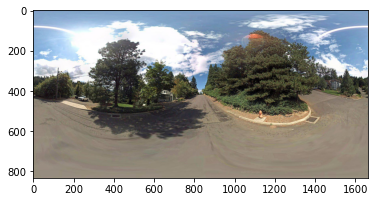

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

panoImgFile = r'eafmhFVHAaIHJ7l3YPOdYA.jpg'
cylindrialPanoImg = np.array(Image.open(panoImgFile))
plt.imshow(cylindrialPanoImg)

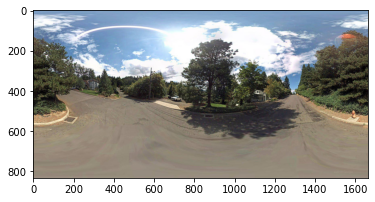

In [49]:
yaw = 100
cylindricalSkyImg = ShiftCylindricalPanoImg(cylindrialPanoImg, yaw)
plt.imshow(cylindricalSkyImg)

In [52]:
from PIL import Image
import numpy as np
import os, os.path
import math

# read the hemispherical image
# cylindrialPanoImg = np.array(Image.open(panoImgFile))
dims = cylindrialPanoImg.shape
rows = dims[0]
cols = dims[1]

# # shift the original segmented based on the yaw angle
# cylindricalSkyImg = ShiftCylindricalPanoImg(cylindrialPanoImg, yaw)

azimuth = 100
sunele = 40

# get the row and col number of sun pos on the cylindrical panorama, it depends on the side of image
[px, py] = SunPosOnCylindricalImage_noaa(cylindricalSkyImg, azimuth, sunele)
# del cylindrialPanoImg
px, py

(1294, 231)

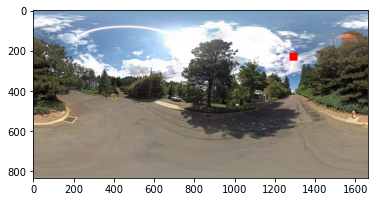

In [51]:
size = 20
cylindricalSkyImg[py - size: py + size, px - size: px+size, 0] = 255
cylindricalSkyImg[py - size: py + size, px - size: px+size, 1] = 0
cylindricalSkyImg[py - size: py + size, px - size: px+size, 2] = 0


plt.imshow(cylindricalSkyImg)